In [10]:
%matplotlib inline
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
def beta(x,a,b):
    y = st.beta.pdf(x,a,b)
    return y

import scipy.stats as st 

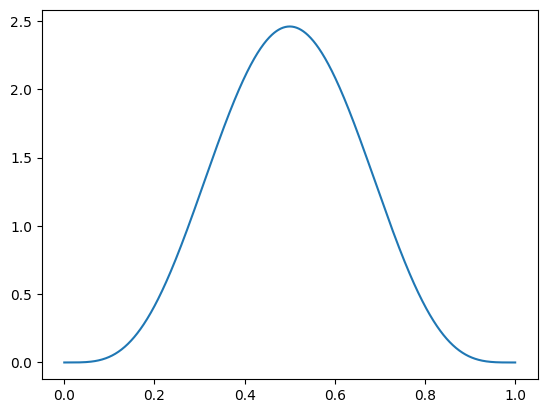

In [11]:
a = 5
b = 5
x = np.linspace(0,1,1000)
y = beta(x,a,b)
plt.plot(x,y)

In [12]:
n= 1000
post = np.zeros(n)
init = .99
sigma_step = 0.01
post[0] = init

for i in range(1,n):
    initdx = init + st.norm.rvs(loc=0, scale = sigma_step, size=1)
    p_curr = beta(init,a,b)
    p_prop = beta(initdx,a,b)
    if (initdx < 0 or initdx) > 1:
        p_prop = p_curr
    elif min(p_prop/p_curr,1) > st.uniform.rvs(loc=0, scale=1, size=1):
        post[i] = initdx
        init = initdx
    else:
        post[i] = init



/tmp/ipykernel_2458/1401102750.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  post[i] = initdx
/tmp/ipykernel_2458/1401102750.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  post[i] = init


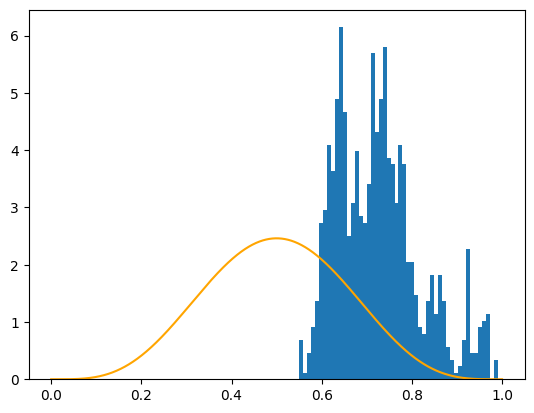

In [13]:
plt.hist(post, density=True,bins=50)        
plt.plot(x,y,color="orange")

/tmp/ipykernel_2458/4038051343.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  post[i] = initdx
/tmp/ipykernel_2458/4038051343.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  post_y[i] = beta(initdx, a, b)
/tmp/ipykernel_2458/4038051343.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  post[i] = init
/tmp/ipykernel_2458/4038051343.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure

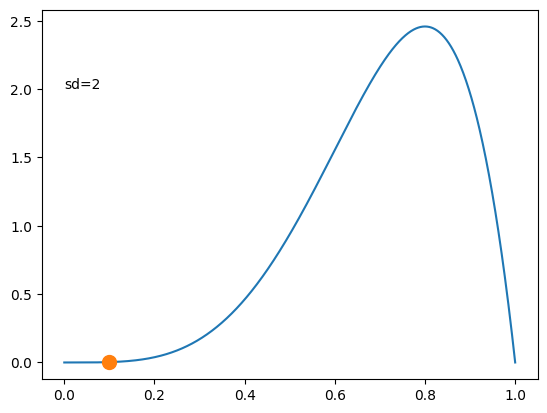

In [14]:
fig, ax = plt.subplots()

a = 5
b = 2
x = np.linspace(0,1,1000)
y = beta(x,a,b)
ax.plot(x,y)
plt.text(0,2,"sd=2")

n= 300
post = np.zeros(n)
post_y = np.zeros(n)
init = .1
sigma_step = 2
post[0] = init
post_y[0] = beta(init,a,b)

for i in range(1,n):
    initdx = init + st.norm.rvs(loc=0, scale = sigma_step, size=1)
    p_curr = beta(init,a,b)
    p_prop = beta(initdx,a,b)
    if (initdx < 0 or initdx) > 1:
        post[i] = init
        post_y[i] = beta(init, a, b)
    elif min(p_prop/p_curr,1) > st.uniform.rvs(loc=0, scale=1, size=1):
        post[i] = initdx
        post_y[i] = beta(initdx, a, b)
        init = initdx
    else:
        post[i] = init
        post_y[i] = beta(init, a, b)

# create a point in the axes
point, = ax.plot(post[0],post_y[0], marker="o",markersize=10)

# Updating function, to be repeatedly called by the animation
def update(i):
    # obtain point coordinates 
    x,y = np.array([post[i], post_y[i]])
    # set point's coordinates
    point.set_data([x],[y])
    return point,

# create animation with 10ms interval, which is repeated,
# provide the full circle (0,2pi) as parameters
ani = FuncAnimation(fig, update, interval=100, blit=True, repeat=False,
                    frames=np.arange(1,n),save_count=n)



In [15]:
HTML(ani.to_html5_video())

In [16]:
with open("pymc3_sd_large.html", "w") as f:
    print(ani.to_html5_video(), file=f)